<a href="https://colab.research.google.com/github/Bharathsujay/CVIP./blob/main/EDA_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [121]:
df=pd.read_csv('/content/Terrorism.csv',encoding='ISO-8859-1')

In [122]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [123]:
df.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [124]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [125]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [126]:
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
state            13
Region            0
city              0
latitude         90
longitude        90
AttackType        0
Killed          615
Wounded        1791
Target           56
Summary        4311
Group             1
Target_type       0
Weapon_type       1
Motive         4573
dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         5109 non-null   int64  
 1   Month        5109 non-null   int64  
 2   Day          5109 non-null   int64  
 3   Country      5109 non-null   object 
 4   state        5096 non-null   object 
 5   Region       5109 non-null   object 
 6   city         5109 non-null   object 
 7   latitude     5019 non-null   float64
 8   longitude    5019 non-null   float64
 9   AttackType   5109 non-null   object 
 10  Killed       4494 non-null   float64
 11  Wounded      3318 non-null   float64
 12  Target       5053 non-null   object 
 13  Summary      798 non-null    object 
 14  Group        5108 non-null   object 
 15  Target_type  5109 non-null   object 
 16  Weapon_type  5108 non-null   object 
 17  Motive       536 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage

Destructive Feature of data


In [128]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: United States
City with the most attacks: New York City
Region with the most attacks: Western Europe
Year with the most attacks: 1976
Month with the most attacks: 5
Group with the most attacks: Irish Republican Army (IRA)
Most Attack Types: Bombing/Explosion


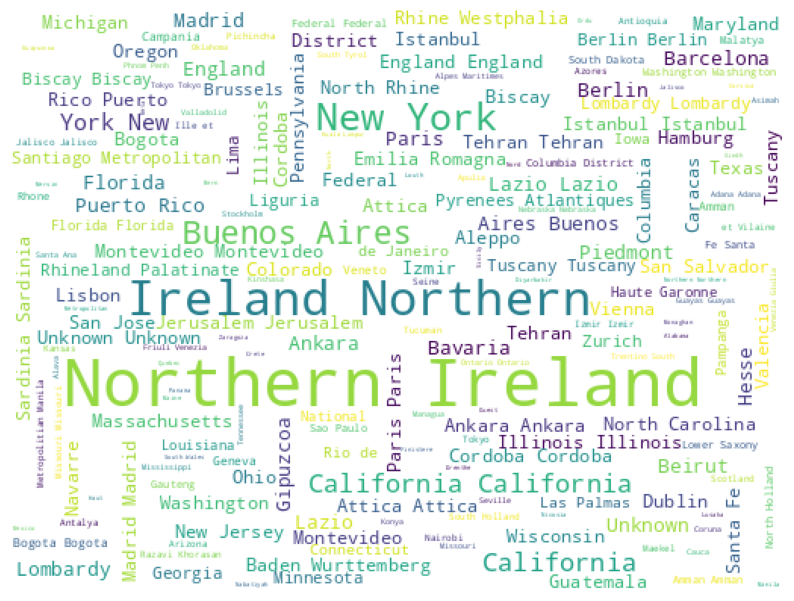

In [129]:
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [130]:
df['Year'].value_counts(dropna = False).sort_index()

1970    651
1971    471
1972    568
1973    473
1974    581
1975    740
1976    923
1977    702
Name: Year, dtype: int64

DATA VISUALISATION

Number of Terrorist Activities each Year

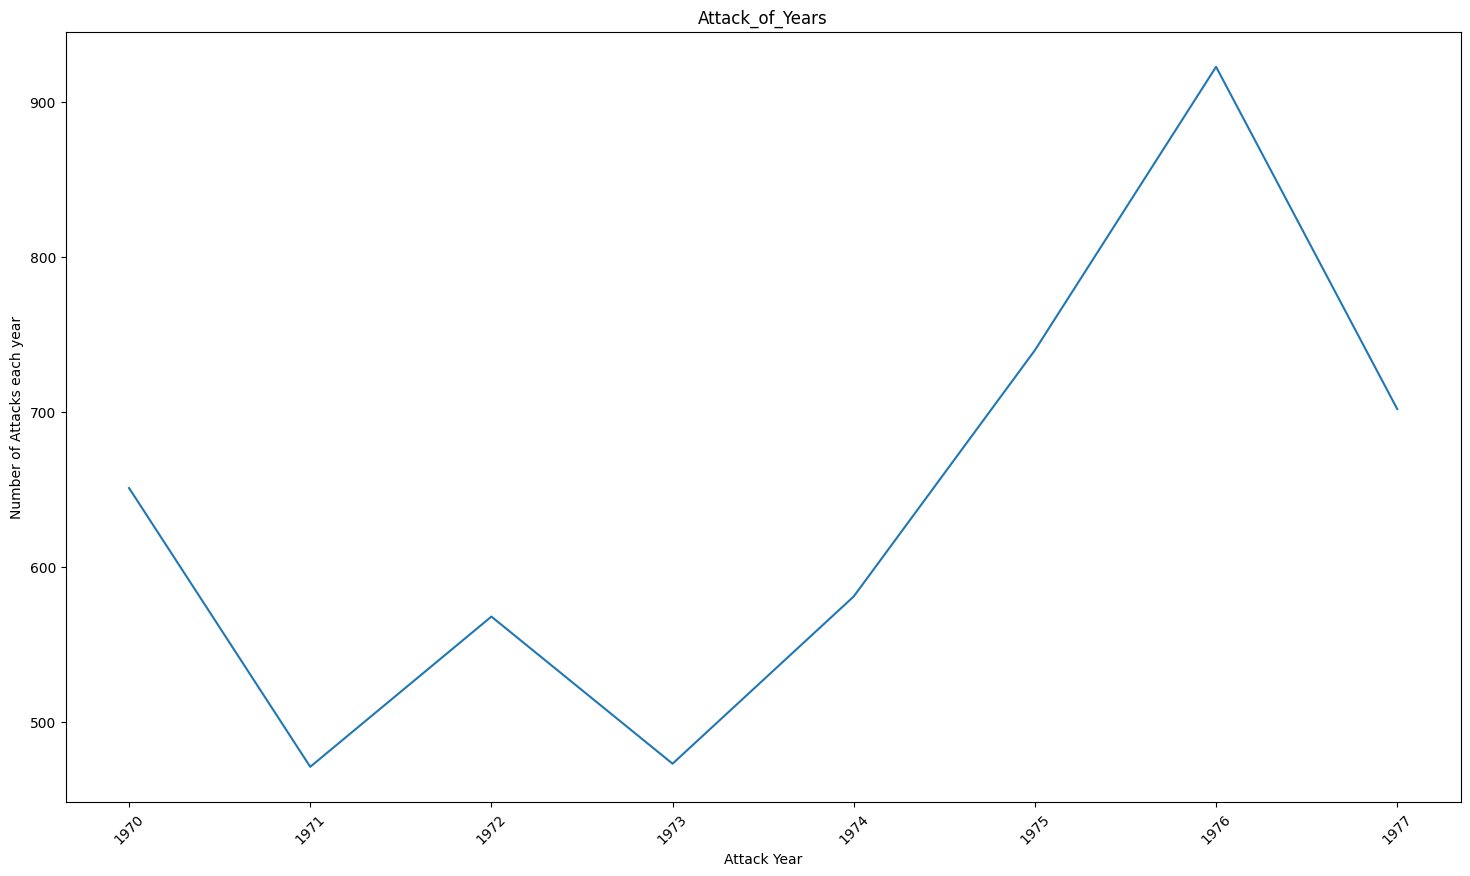

In [131]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.lineplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

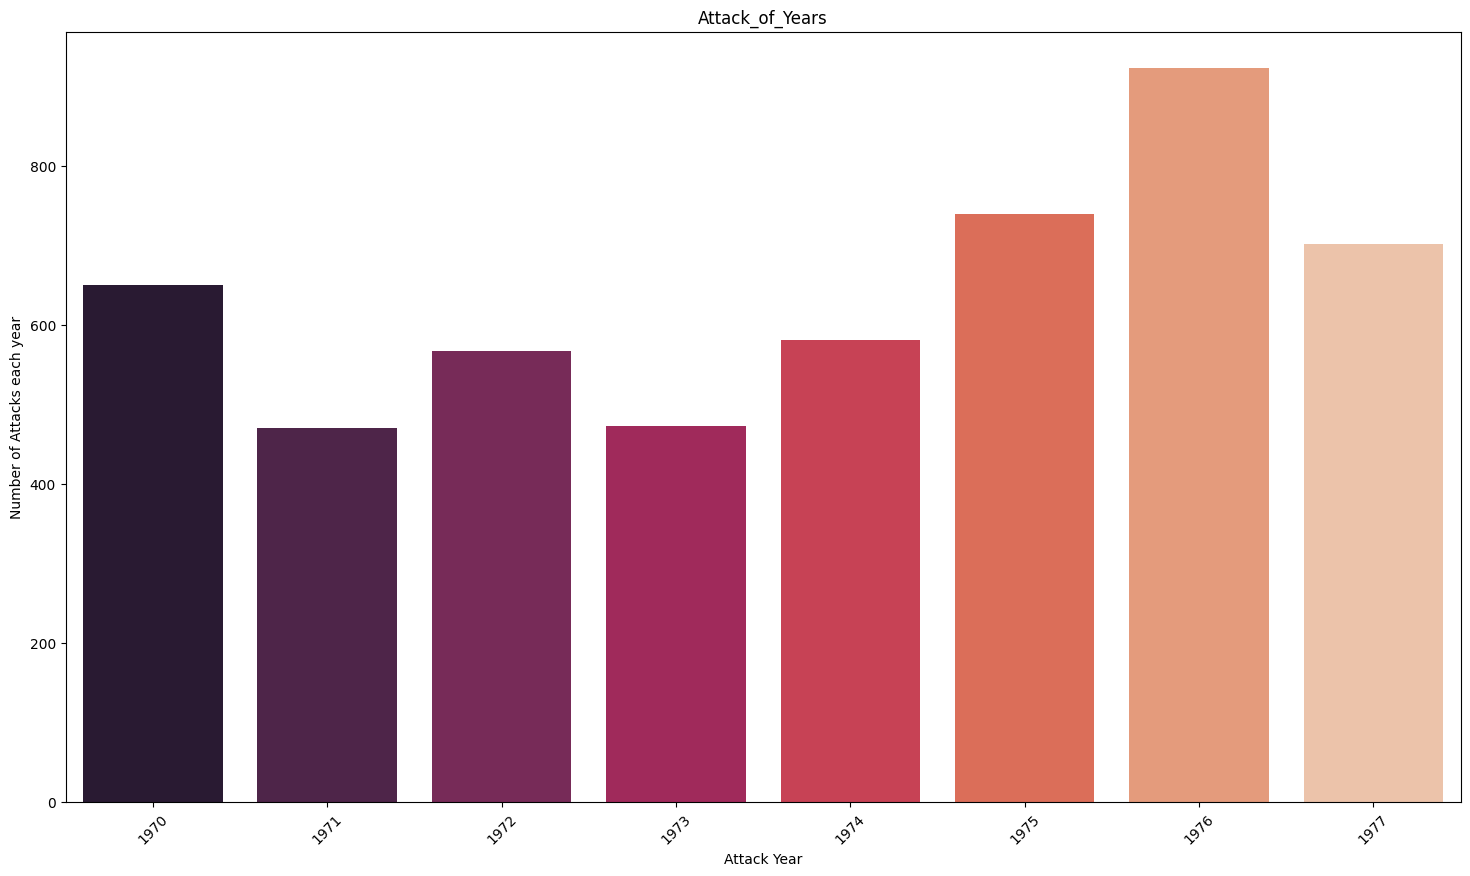

In [132]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

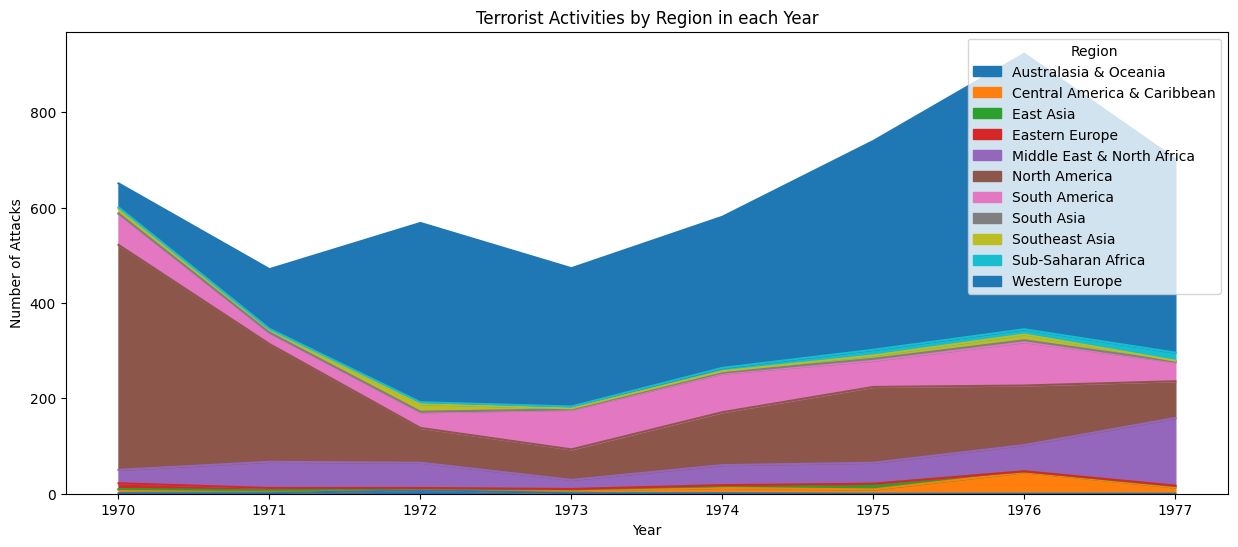

In [133]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [134]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize




In [135]:
df1 = df.sort_values(by='casualities',ascending=False)[:40]

In [136]:
heat=df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [137]:
heat.head()

Year,1970,1972,1973,1974,1975,1976,1977
Country,,,,,,,
Argentina,0.0,0.0,0.0,0.0,92.0,52.5,0.0
Barbados,0.0,0.0,0.0,0.0,0.0,73.0,0.0
France,0.0,0.0,0.0,36.0,0.0,0.0,0.0
Greece,0.0,0.0,60.0,88.0,0.0,0.0,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,295.0,0.0


In [138]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [139]:
df.Country.value_counts()[:15]

United States         1260
United Kingdom        1245
Italy                  369
Spain                  345
Argentina              279
Turkey                 232
West Germany (FRG)     225
France                 178
Greece                  83
Iran                    67
Mexico                  61
Colombia                58
Uruguay                 48
Lebanon                 48
Philippines             36
Name: Country, dtype: int64

Top Countries affected by Terror Attacks



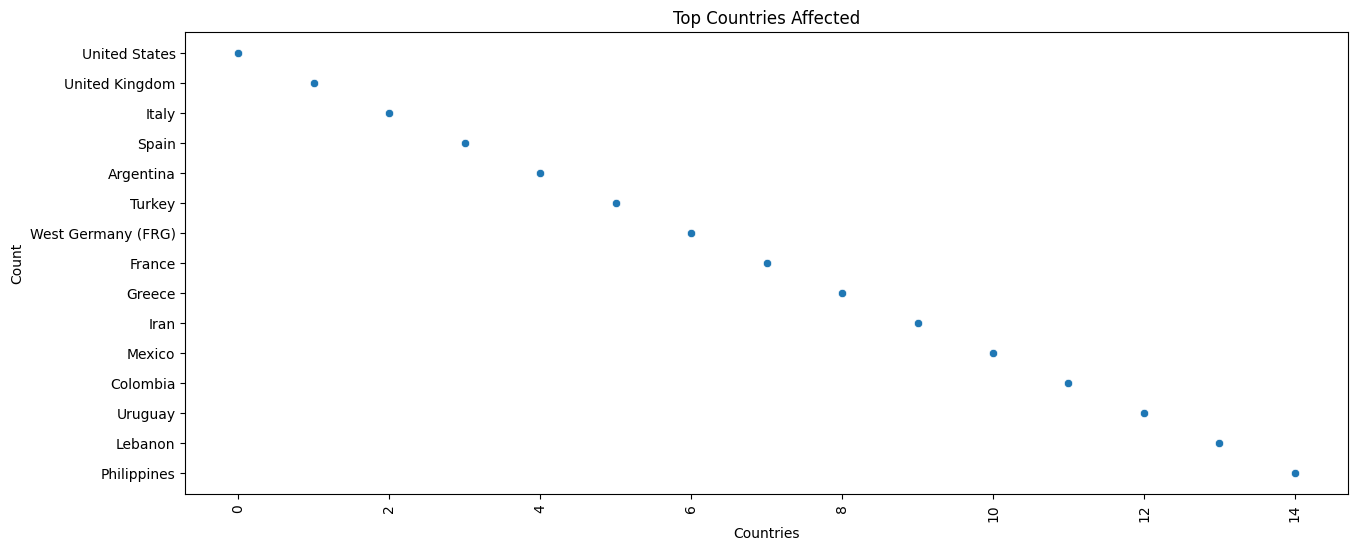

In [140]:
plt.subplots(figsize=(15,6))
sns.scatterplot(df['Country'].value_counts()[:15].index.values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [141]:
# Total Number of people killed in terror attack
killData =df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 3303


In [142]:
# Let's look at what types of attacks these deaths were made of.
attackData = df.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [143]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [144]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,649,1141,1197,18,71,125,72,1,29


In [145]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


In [146]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [147]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,...,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Yugoslavia,Zaire,Zambia
Killed,0,0,0,0,298,1,9,0,0,73,...,1,1537,154,4,1,3,42,2,1,5


In [148]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


In [149]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [150]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,...,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Yugoslavia,Zaire,Zambia
Killed,0,0,0,0,298,1,9,0,0,73,...,1,1537,154,4,1,3,42,2,1,5


In [151]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

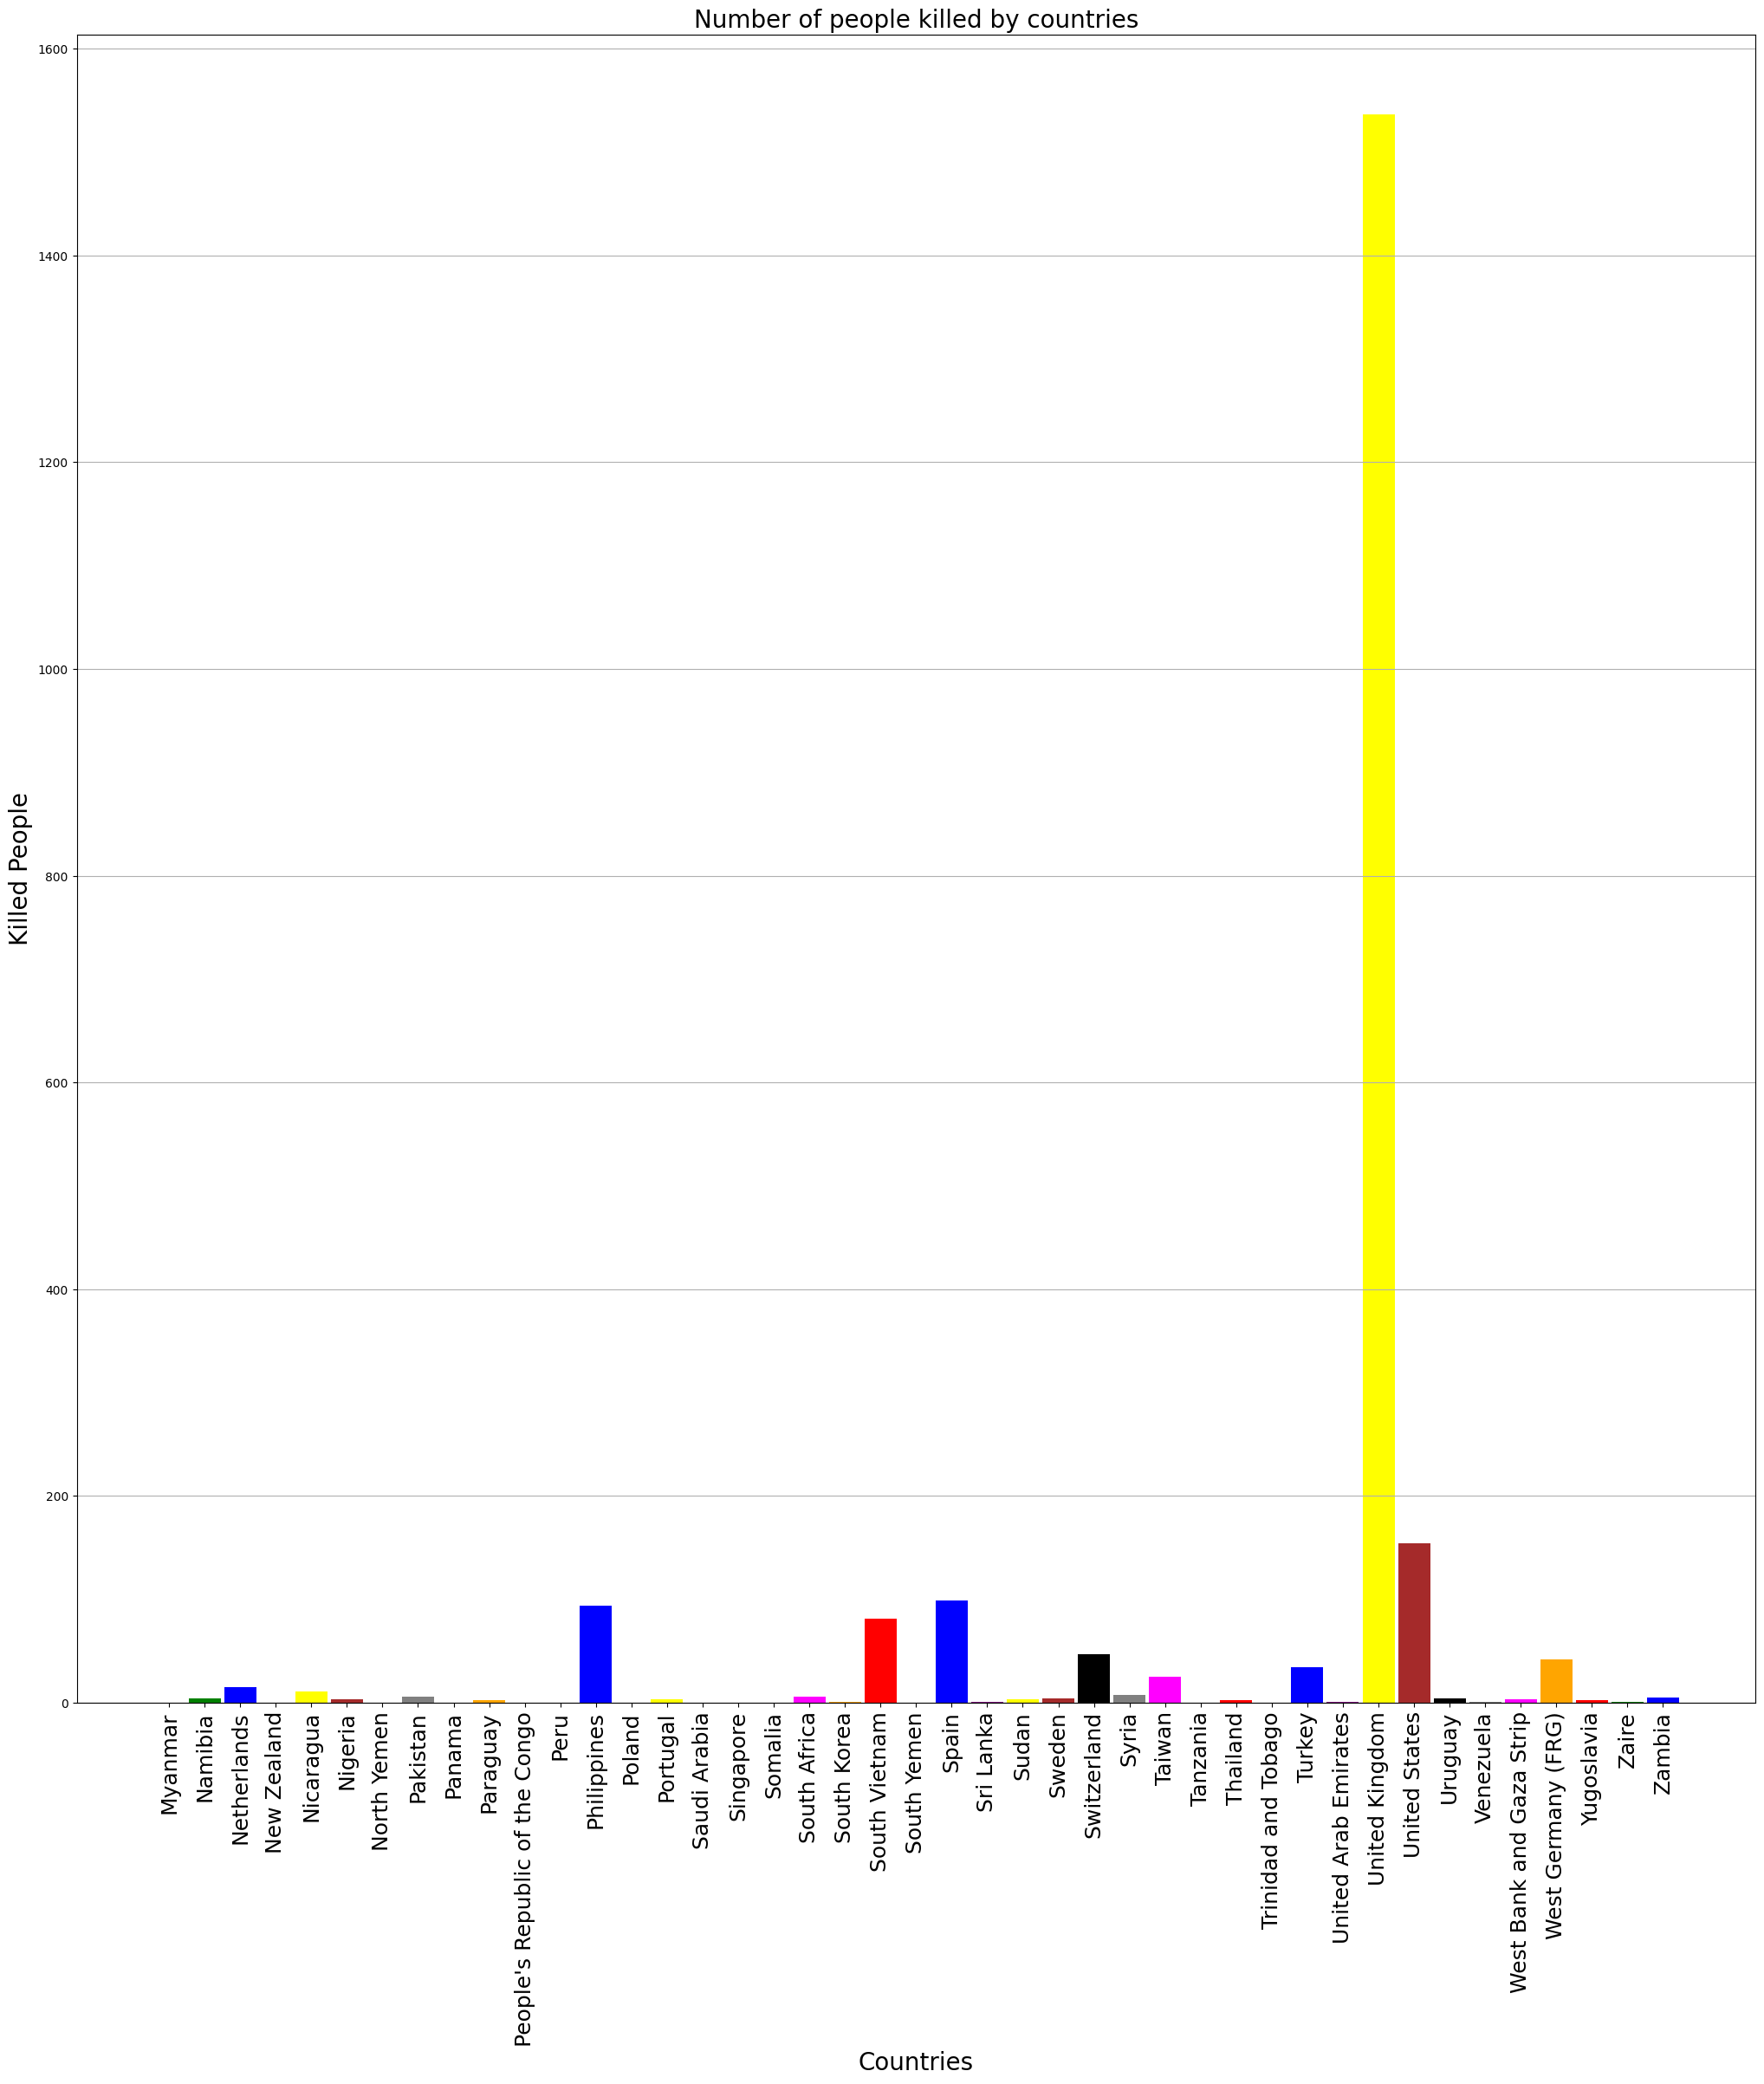

In [152]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

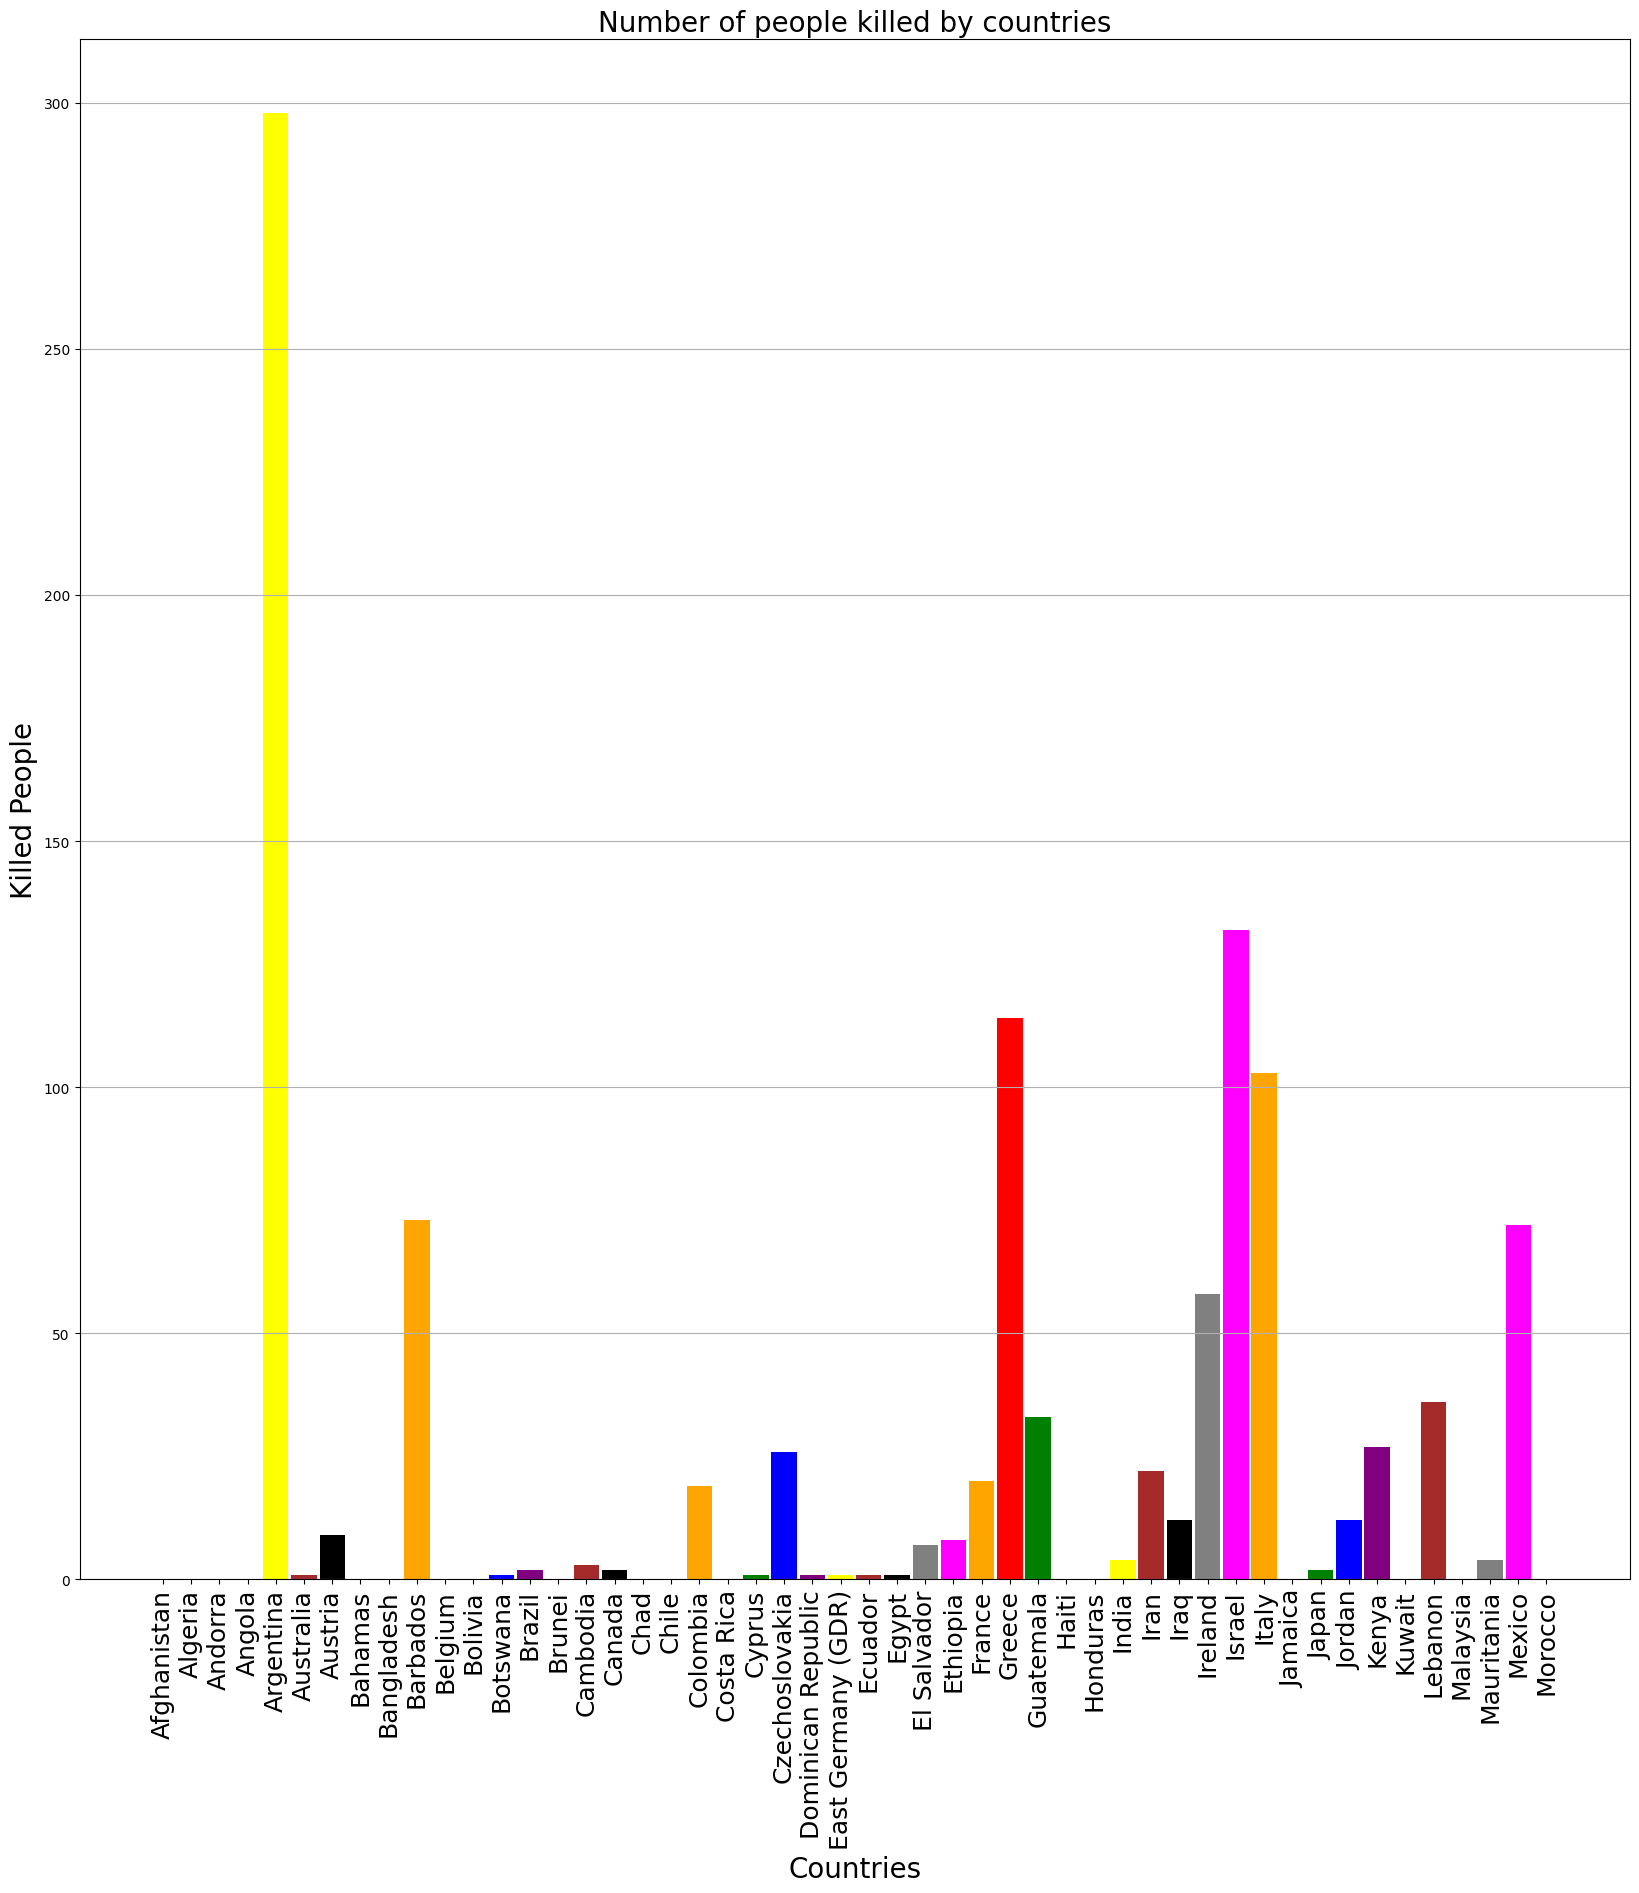

In [153]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

In [154]:
country_attacks = df.groupby('Country').size().reset_index(name='count').sort_values(by='count', ascending = False)
top5_country = country_attacks.head(5)

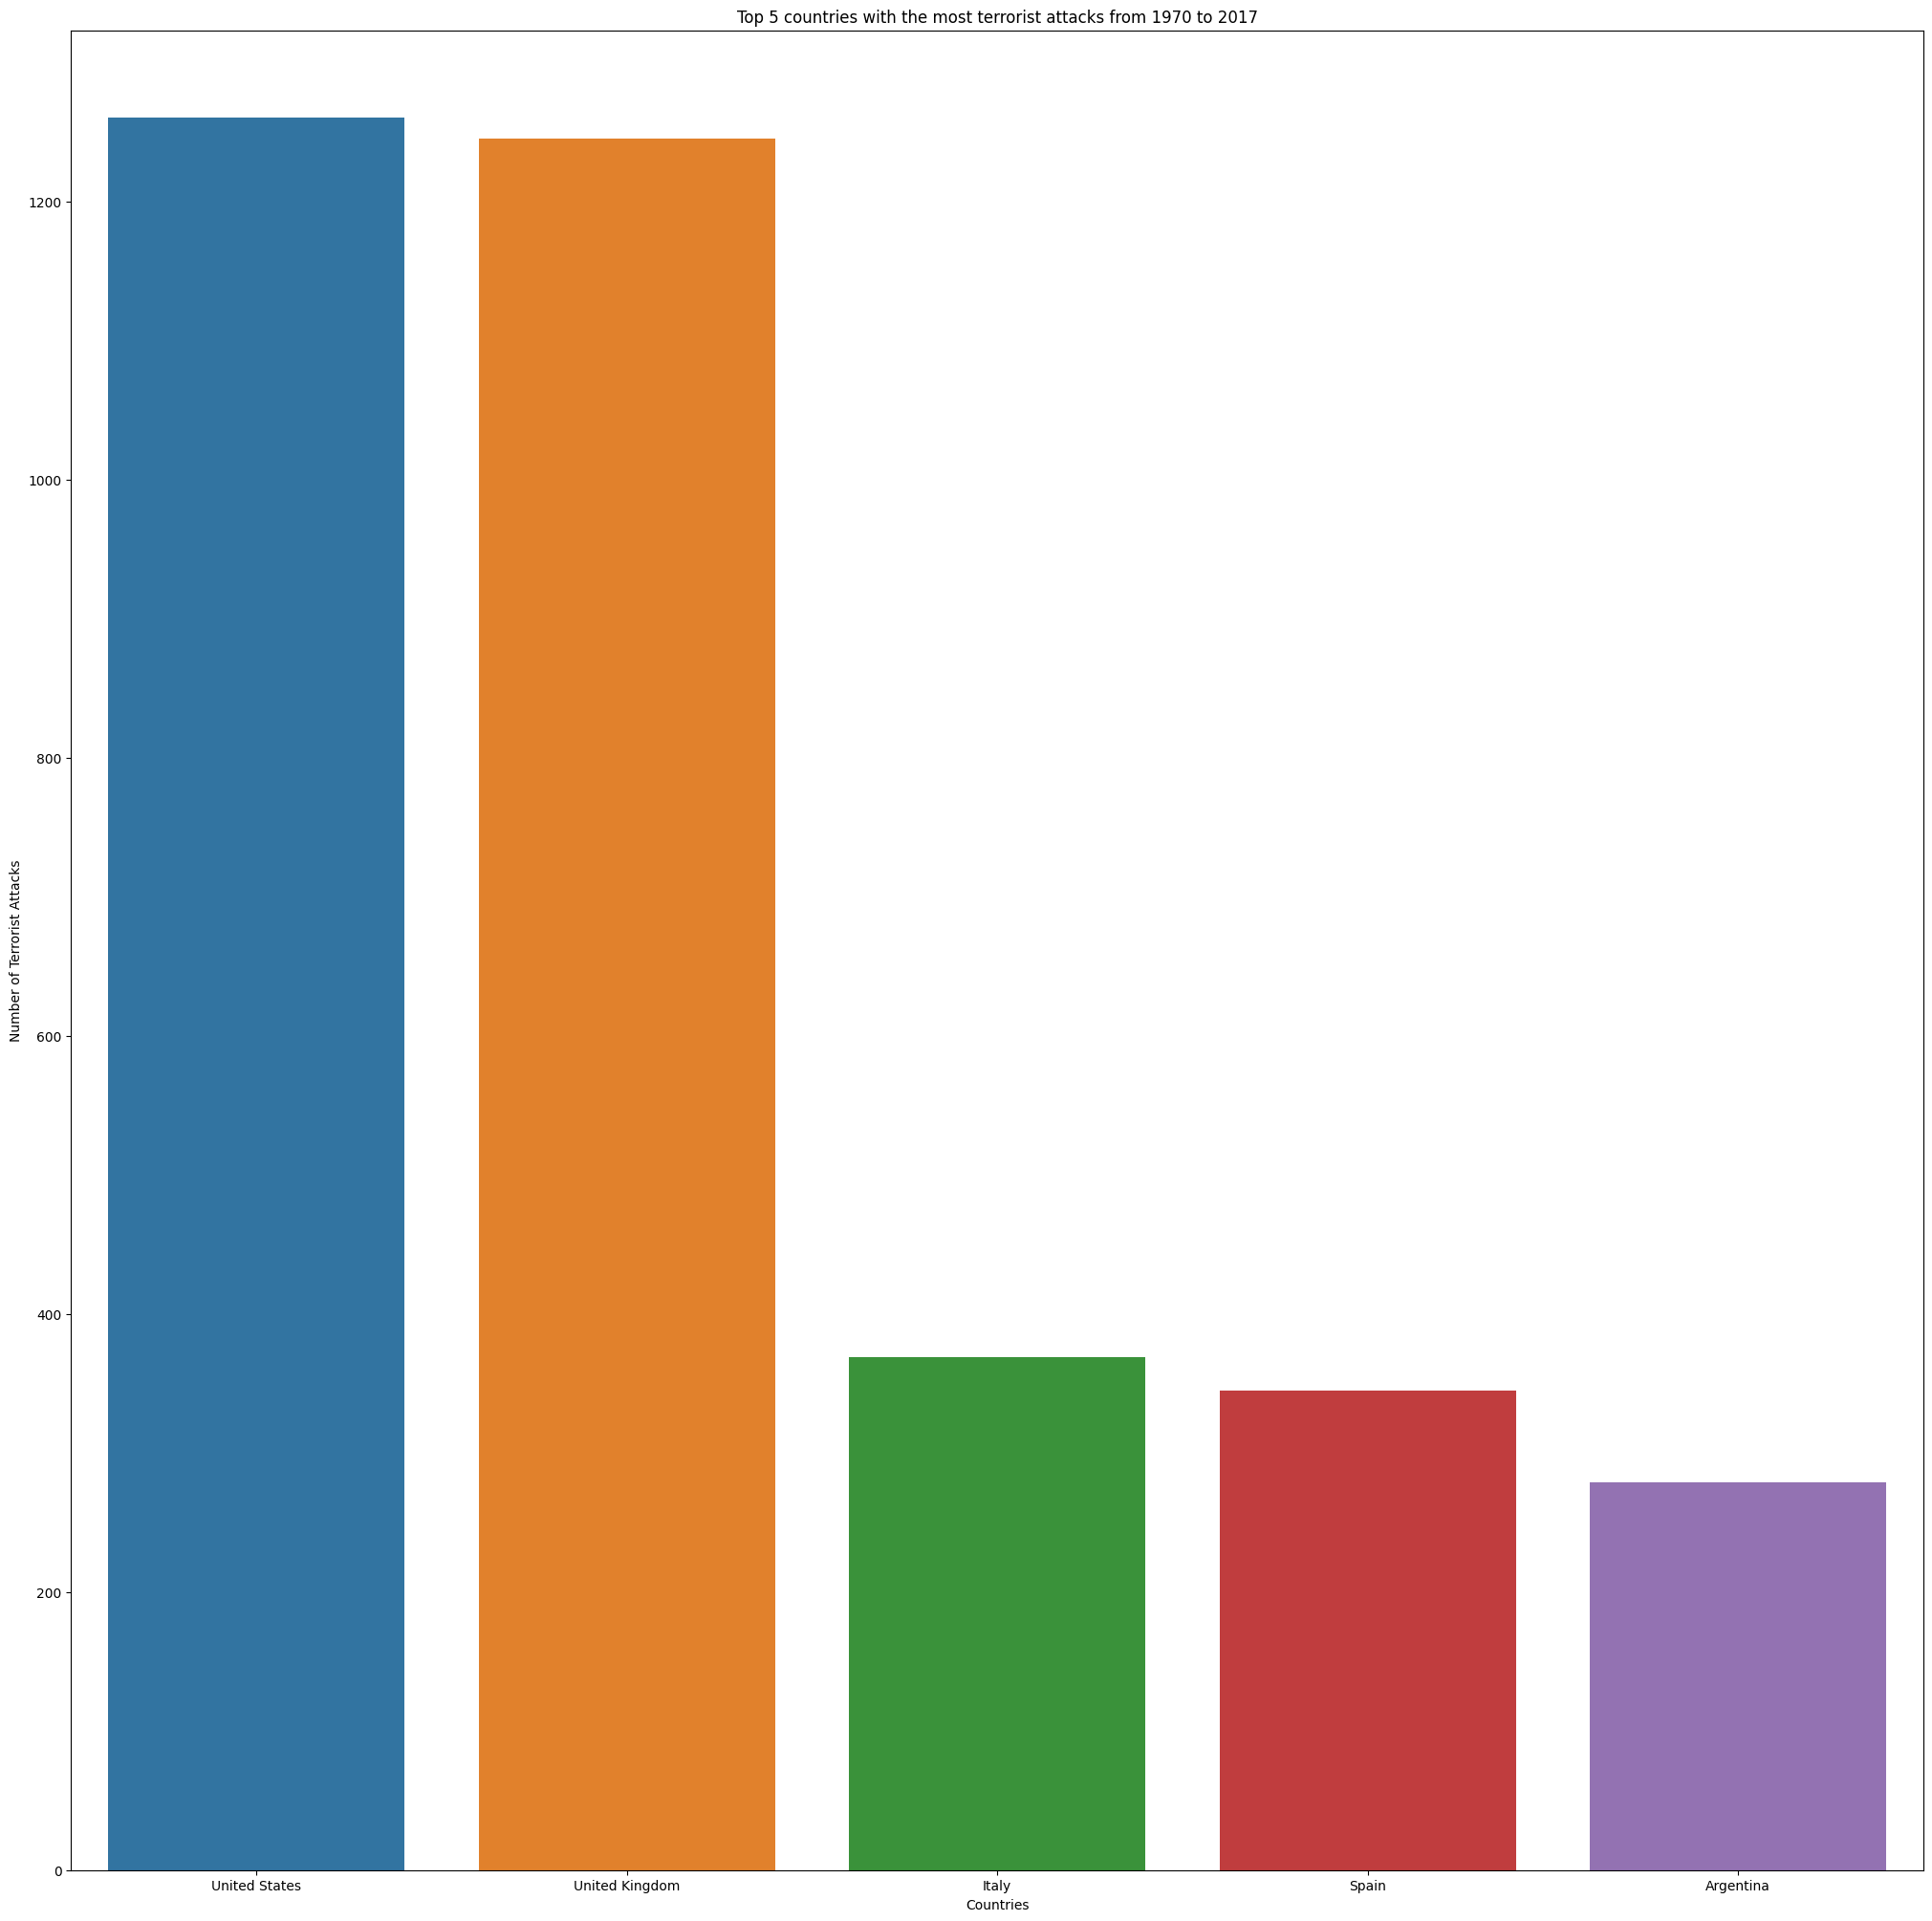

In [155]:
sns.barplot(x='Country', y='count', data=top5_country)
plt.title('Top 5 countries with the most terrorist attacks from 1970 to 2017')
plt.xlabel('Countries')
plt.ylabel('Number of Terrorist Attacks')
plt.show()